In [1]:
import e2e_process
# from kie_gcn import InvoiceGCN
from PIL import Image
from IPython.display import display
import cv2
from orientation_checking import OrientationChecker
from PIL import Image
from IPython.display import display
import time

import preprocess_img
import cv2

/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
orientationChecker = OrientationChecker( model_path= "./weights/orientation/invoice_rotation_220920.pth")
e2e_OCR_Engine = e2e_process.E2E_OCR_Engine(
    detection_model_path="PaddleOCR/pretrained_models/det_db_inference_221109",
    text_recognition_model_path="./weights/ocr/ocr_221026.pth",
    gcn_state_dict_path="./weights/gcn/GCN_221103_state_dict.pth"
)
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

running build_ext


Loading codes from weights/nlp/PhoBERT_base_fairseq/bpe.codes ...
Read 64000 codes from the codes file.


download time:  0.17250609397888184
extracted_line time: 0.04877209663391113
ocr_line time: 1.369624137878418
make graph:  0.389554500579834
transform:  0.4385862350463867
raw_text Tuổi 22 tháng tuổi Giới tính Nam
admissiion_date: 1/10/2022
total models time: 3.3397130966186523
Total process time: 3.5125069618225098


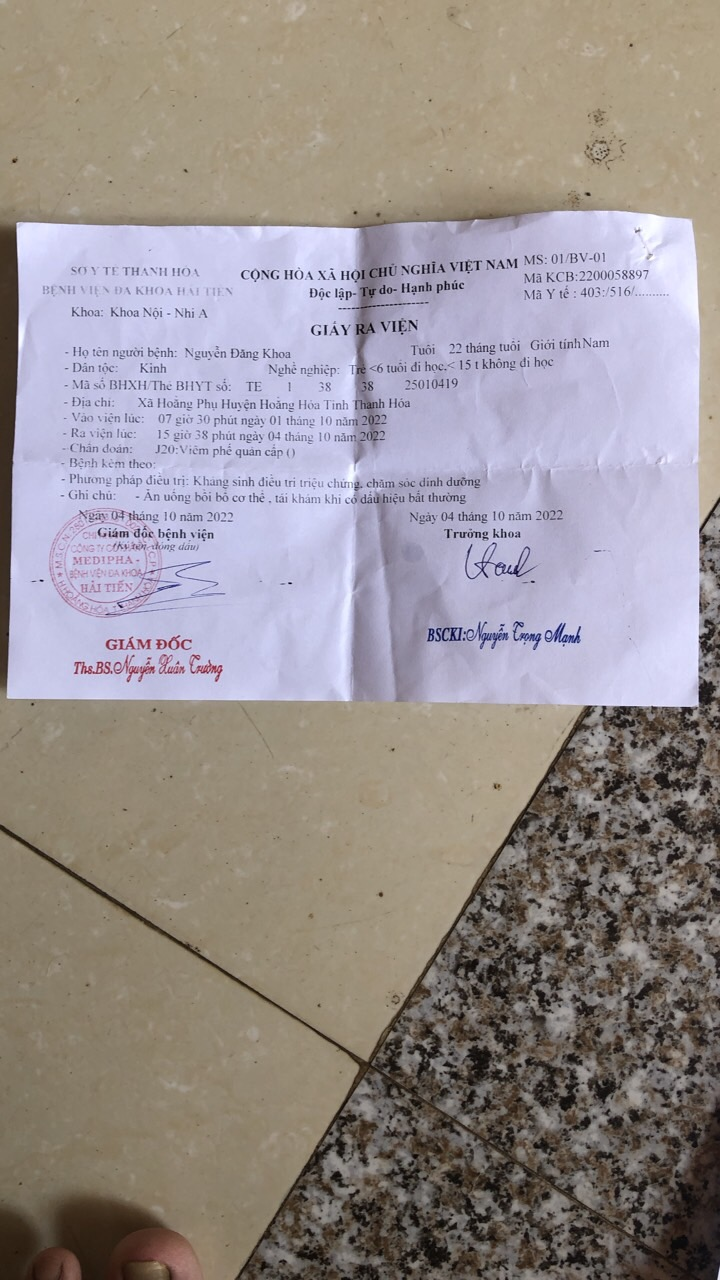

In [3]:
start = time.time()

s_time = time.time()
object_name = 'b6806b2f-e160-48b9-80d2-1013afafe061_HospitalDischargePaper_1665659447.jpeg'
image = downandLoadImage(object_name)
print("download time: ", time.time() - s_time)

model_time = time.time()
# img_path = "./imgs_test/273.jpeg"
# image = cv2.imread(img_path)
rotated_img, pred_class = orientationChecker(image)
result, extracted_df = e2e_OCR_Engine(rotated_img)
# print(pred_class, time.time() - start)
print("total models time:", time.time() - model_time)
print("Total process time:", time.time() - start)
display(Image.fromarray(cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR)))
# torch.cuda.empty_cache()

In [4]:
result

{'data': [{'info': {'medical_facility': 'BỆNH VIỆN ĐA KHOA HÁI TIÊN',
    'medical_facility_box': [],
    'medical_facility_confidence': 0,
    'patient_name': 'Nguyễn Đăng Khoa',
    'patient_name_box': [],
    'patient_name_confidence': 0,
    'year_of_birth': 1.8333333333333333,
    'year_of_birth_box': [],
    'year_of_birth_confidence': 0,
    'gender': 'Nam',
    'gender_box': [],
    'gender_confidence': 0,
    'hospitalization_date': '01/10/2022',
    'hospitalization_date_box': [],
    'hospitalization_date_confidence': 0,
    'hospital_discharge_date': '04/10/2022',
    'hospital_discharge_date_box': [],
    'hospital_discharge_date_confidence': 0,
    'icd_10': [{'icd': 'J20', 'box': [], 'score': -1}],
    'image_seals': 'UN_CHECKED',
    'medical_facility_score': 0.9908964037895203,
    'patient_name_score': 0.9984931945800781,
    'gender_score': 0.9784817099571228,
    'year_of_birth_score': 0.9784817099571228,
    'hospitalization_date_score': 0.9999639987945557,
    'ho

In [6]:
extracted_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,39,275,231,301,BỆNH VIỆN ĐA KHOA HÁI TIÊN,hospital_name,0.990896,"[(40, 275), (231, 279), (230, 302), (39, 298)]"
1,1,67,260,201,280,SƠ Y TẾ THANH HÓA,None,0.983530,"[(68, 260), (201, 262), (201, 281), (67, 278)]"
2,2,239,245,608,289,CỘNG HÒA XÃ HỌI CHỦ NGHĨA VIỆT NAM MS: 01/BV.01,None,0.999454,"[(239, 266), (607, 245), (608, 269), (240, 290)]"
3,3,304,273,467,304,Độc lập Tự do- Hạnh phúc,None,0.997599,"[(304, 284), (466, 273), (467, 294), (305, 305)]"
4,4,519,260,650,285,Mã KCB: 2200058897,None,0.987370,"[(519, 263), (650, 260), (650, 283), (519, 286)]"
5,5,520,280,647,302,Mã Y tế : 403:/516/.,None,0.999827,"[(520, 285), (647, 280), (647, 298), (520, 303)]"
6,6,66,300,209,321,Khoa: Khoa Nội - Nhi A,department,0.999991,"[(66, 300), (209, 301), (209, 322), (66, 320)]"
7,7,308,315,419,338,GIẤY RA VIỆN,document_type,0.999830,"[(308, 318), (418, 315), (419, 336), (309, 339)]"
8,8,62,359,124,374,- Dân tộc:,None,0.999898,"[(62, 359), (124, 359), (124, 375), (62, 375)]"
9,9,63,341,291,364,- Họ tên người bệnh: Nguyễn Đăng Khoa,patient_name,0.998493,"[(64, 341), (291, 343), (291, 365), (63, 363)]"


In [15]:
import postprocess
import importlib
import pandas as pd
importlib.reload(postprocess)
x = postprocess.KiePostProcess()

In [16]:
x.append_kie_df(extracted_df)

In [17]:
extracted_age, extracted_scores =  x.get_raw_predicted("age", x.predicted_kie_df)

In [18]:
x.age_regularization(extracted_age[0])

raw_text Tuổi 22 tháng tuổi Giới tính Nam


(1.8333333333333333, 'Nam')

In [19]:
extracted_gender

['Tuổi 22 tháng tuổi Giới tính Nam']

In [7]:
import copy

In [21]:
empty_extracted_result = {
        "data": [
            {
            "info":
                {
                    "medical_facility": None,
                    "medical_facility_box": [],
                    "medical_facility_confidence": 0,
                    
                    "patient_name": None,
                    "patient_name_box": [],
                    "patient_name_confidence": 0,
                    
                    "year_of_birth": None,
                    "year_of_birth_box": [],
                    "year_of_birth_confidence": 0,
                    
                    "gender": None,
                    "gender_box": [],
                    "gender_confidence": 0,
                    
                    "hospitalization_date": None,
                    "hospitalization_date_box": [],
                    "hospitalization_date_confidence": 0,
                    
                    "hospital_discharge_date": None,
                    "hospital_discharge_date_box": [],
                    "hospital_discharge_date_confidence": 0,
                    
                    "icd_10": [],

                    "image_seals": "UN_CHECKED",

                },
            "pages": [],
            "type": None,
            },
            ]
        }

In [31]:
full_extracted_result = copy.deepcopy(empty_extracted_result)

hospital_name, hospital_name_score = x.hospital_name_postprocess()
if hospital_name == None:
    hospital_name, hospital_name_score = x.find_hospital_name_remain()
# print("hospital_name:", hospital_name)

patient_name, patient_name_score = x.patient_name_postprocess()
if patient_name == None:
    patient_name, patient_name_score = x.find_patient_name_remain()
# print("patient_name:", patient_name)

(age, age_score), (temp_gender, temp_gender_score) = x.age_postprocess()
(gender, gender_score), (temp_age, temp_age_score) = x.gender_postprocess()
if age == None and temp_age != None:
    age = temp_age
    age_score = temp_age_score
if gender == None and temp_gender != None:
    gender = temp_gender
    gender_score = temp_gender_score

if age == None:
    (age, age_score), (temp_gender, temp_gender_score) = x.find_age_remain()

# print("gender:", gender)
# print("age:", age)

admissiion_dates, admissiion_dates_scores = x.admission_date_postprocess()
for each in admissiion_dates:
    print("admissiion_date:", each)

discharge_dates, discharge_dates_scores = x.discharge_date_postprocess()
# for each in discharge_dates:
    # print("discharge_date:", each)

admissiion_dates, admissiion_dates_scores , discharge_dates, discharge_dates_scores = x.admission_discharge_correction(admissiion_dates, admissiion_dates_scores , discharge_dates, discharge_dates_scores)

sign_dates, sign_dates_scores = x.sign_date_postprocess()
# for each in sign_dates:
    # print("sign_date:", each)


ICD_codes = x.ICD_code_postprocess()
# print("ICD_codes:", ICD_codes)

main_extracted_result = full_extracted_result["data"][0]["info"]
if hospital_name != None:
    main_extracted_result["medical_facility"] = hospital_name
    main_extracted_result["medical_facility_score"] = hospital_name_score
if patient_name != None:
    main_extracted_result["patient_name"] = patient_name
    main_extracted_result["patient_name_score"] = patient_name_score
if gender != None:
    main_extracted_result["gender"] = gender
    main_extracted_result["gender_score"] = gender_score
if age != None:
    main_extracted_result["age"] = age
    main_extracted_result["age_score"] = age_score
    
main_extracted_result["hospitalization_date"] = admissiion_dates
main_extracted_result["hospitalization_date_score"] = admissiion_dates_scores

main_extracted_result["discharge_date"] = discharge_dates
main_extracted_result["discharge_date_score"] = discharge_dates_scores

main_extracted_result["sign_date"] = sign_dates
main_extracted_result["sign_date_score"] = sign_dates_scores

org_icd_code = []
for each in ICD_codes:
    temp_icd = {
        "icd": each,
        "box": [],
        "score": -1
    }
    org_icd_code.append(temp_icd)
main_extracted_result["icd-10"] = org_icd_code
full_extracted_result["data"][0]["info"] = main_extracted_result

admissiion_date: 7/10/2022


In [30]:
full_extracted_result

{'data': [{'info': {'medical_facility': 'TTYT THÀNH PHỐ ĐÔNG HÀ',
    'medical_facility_box': [],
    'medical_facility_confidence': 0,
    'patient_name': 'NGUYỄN THỊ THẾ ANH',
    'patient_name_box': [],
    'patient_name_confidence': 0,
    'year_of_birth': None,
    'year_of_birth_box': [],
    'year_of_birth_confidence': 0,
    'gender': 'Nam',
    'gender_box': [],
    'gender_confidence': 0,
    'hospitalization_date': 0.9263669848442078,
    'hospitalization_date_box': [],
    'hospitalization_date_confidence': 0,
    'hospital_discharge_date': None,
    'hospital_discharge_date_box': [],
    'hospital_discharge_date_confidence': 0,
    'icd_10': [],
    'image_seals': 'UN_CHECKED',
    'medical_facility_score': 0.9996083378791809,
    'patient_name_score': 0.9999749660491943,
    'gender_score': 0.9949034452438354,
    'age': '34',
    'age_score': 0.9992044568061829,
    'discharge_date': '14/10/2022',
    'discharge_date_score': 0.899635374546051,
    'sign_date': ['14/10/20

In [15]:
x.append_kie_df(extracted_df)

In [16]:
x.admission_date_postprocess()

get_in


(['7/10/2022'], [0.9263669848442078])

In [3]:
x.(test_text)

(7, 10, 2022)

In [4]:
import boto3
import time

s3 = boto3.client('s3')

s_time = time.time()
with open('boto3_temp.jpeg', 'wb') as f:
    s3.download_fileobj('papaya-fwd-prod-stp', '00394ae4-f7c0-43ad-899d-ca073bbd60dc_HospitalDischargePaper_1664927607.jpeg', f)

print("download time: ", time.time() - s_time)

download time:  0.1531085968017578


In [9]:
import preprocess_img
import cv2
from IPython.display import display
from PIL import Image
downandLoadImage = preprocess_img.DownAndLoadImage("papaya-fwd-prod-stp")

In [2]:
img = downandLoadImage('69217a5b-9016-46e3-8d0b-901257b45eb3_HospitalDischargePaper_1666237076.jpeg')

In [6]:
test_set_list = open("selected_test_set.txt", "r", encoding="utf-8").readlines()

In [13]:
for each in test_set_list:
    each = each.strip()
    downandLoadImage.down_img(each)

In [2]:
from orientation_checking import OrientationChecker, OrientationCheckerV2
ocv2 = OrientationCheckerV2()
ocv1 = OrientationChecker( model_path= "./weights/orientation/invoice_rotation_220920.pth")

/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/py39/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
obj_name = 'bb5ef144-9cfd-4546-810e-0123dc92eda8_HospitalDischargePaper_1665626021.jpeg'
test_img = downandLoadImage(obj_name)
# display(Image.fromarray(cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)))

In [10]:
import numpy as np

In [11]:
import time
s_time = time.time()
rotated = ocv2(test_img)
if type(rotated) != np.ndarray:
    rotated, pred_class = ocv1(test_img)
print(time.time() - s_time)


0.42371463775634766


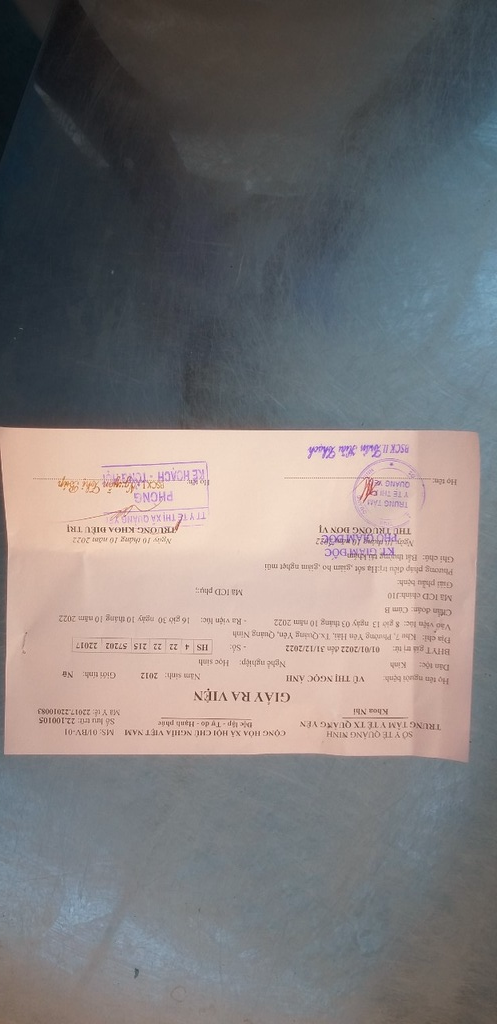

In [12]:
display(Image.fromarray(rotated))

In [13]:
rotated, pred_class = ocv1(test_img)
print(pred_class)

left


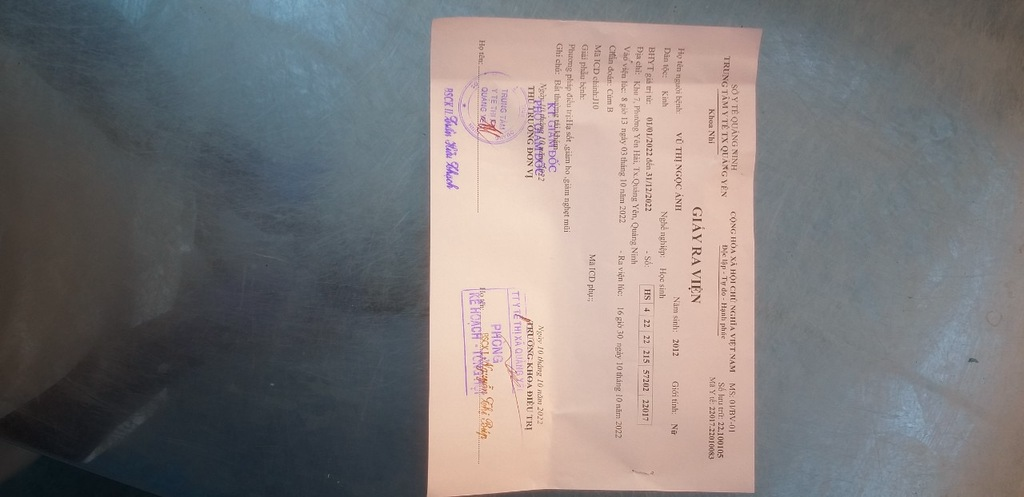

In [14]:
display(Image.fromarray(test_img))